### Some notes about Hugginface `GPT2LMHeadModel` from Andrej Karpathy's mini-gpt video

In [2]:
from transformers import GPT2LMHeadModel

In [3]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")  # 124m parameter model
sd_hf = model_hf.state_dict()

### Interpretation

* 12 = block layers
* 768 = embedding dimension
* 768 / 12 = 64 = head size
* 2304 / 3 (Q, K, V concatenated across dim=-1) = 768 = hidden size

In [7]:
for k, v in sd_hf.items():
    print(f"item: {k} | Shape {v.shape}")

item: transformer.wte.weight | Shape torch.Size([50257, 768])
item: transformer.wpe.weight | Shape torch.Size([1024, 768])
item: transformer.h.0.ln_1.weight | Shape torch.Size([768])
item: transformer.h.0.ln_1.bias | Shape torch.Size([768])
item: transformer.h.0.attn.c_attn.weight | Shape torch.Size([768, 2304])
item: transformer.h.0.attn.c_attn.bias | Shape torch.Size([2304])
item: transformer.h.0.attn.c_proj.weight | Shape torch.Size([768, 768])
item: transformer.h.0.attn.c_proj.bias | Shape torch.Size([768])
item: transformer.h.0.ln_2.weight | Shape torch.Size([768])
item: transformer.h.0.ln_2.bias | Shape torch.Size([768])
item: transformer.h.0.mlp.c_fc.weight | Shape torch.Size([768, 3072])
item: transformer.h.0.mlp.c_fc.bias | Shape torch.Size([3072])
item: transformer.h.0.mlp.c_proj.weight | Shape torch.Size([3072, 768])
item: transformer.h.0.mlp.c_proj.bias | Shape torch.Size([768])
item: transformer.h.1.ln_1.weight | Shape torch.Size([768])
item: transformer.h.1.ln_1.bias | Sh

In [9]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

### Positional Embeddings in Transformer Models

In Transformer models like GPT-2, positional embeddings are crucial because they provide information about the position of each token in the input sequence. Unlike RNNs or LSTMs, which inherently process sequences in order, Transformer models process the entire input sequence simultaneously, lacking a built-in sense of token order. Positional embeddings solve this issue by adding positional information to the input tokens.

### Why Positional Embeddings?

Transformer models operate on sets of tokens without any inherent order. This is beneficial for parallelization but problematic for understanding the sequential nature of language. Positional embeddings encode the position of each token in the sequence, enabling the model to incorporate the order of tokens into its computations.

### How Positional Embeddings Work

Positional embeddings are added to the input embeddings at the bottom of the Transformer stack. For each position in the input sequence, a positional embedding vector is generated and added to the token embedding. This combined embedding is then passed through the Transformer layers.

Mathematically, for a position $pos$ and embedding dimension $i$, the positional embedding is often defined as:
$$
\text{PE}(pos, 2i) = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$
$$
\text{PE}(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
$$
where $d_{\text{model}}$ is the dimensionality of the embeddings.

### Visualization of Positional Embeddings

The following plot visualizes the positional embeddings from the GPT-2 model, where the x-axis represents the embedding dimensions and the y-axis represents the positions in the input sequence. Each pixel's color intensity indicates the embedding value.


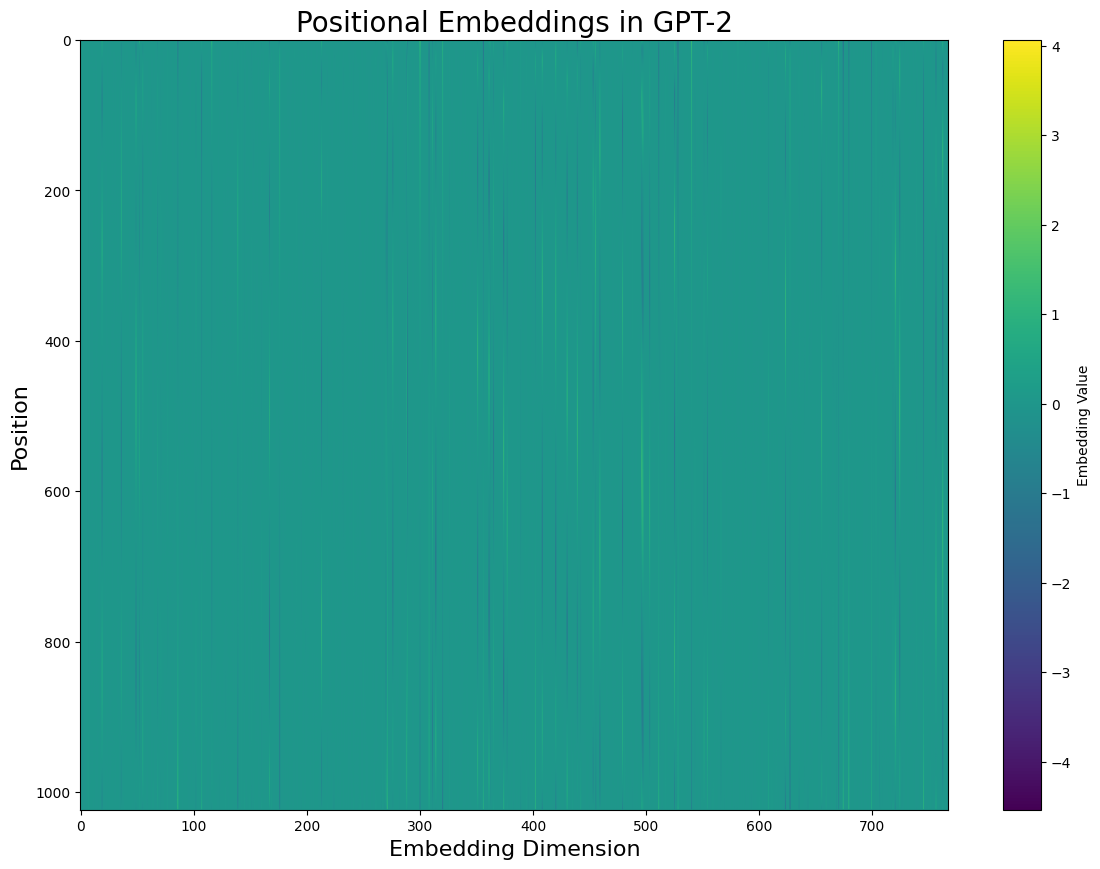

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

positional_embeddings = sd_hf['transformer.wpe.weight']

plt.figure(figsize=(14, 10))
plt.imshow(positional_embeddings, cmap='viridis', aspect='auto')
plt.colorbar(label='Embedding Value')
plt.title('Positional Embeddings in GPT-2', fontsize=20)
plt.xlabel('Embedding Dimension', fontsize=16)
plt.ylabel('Position', fontsize=16)
plt.grid(False)
plt.show()

#### Encoding Positional Information
The plot confirms that positional embeddings in GPT-2 effectively encode positional information, with different dimensions capturing varying aspects of positional variance.

#### Sinusoidal Nature
The periodicity observed in the embeddings is consistent with the sinusoidal positional encoding typically used in Transformers, where embeddings for positions are generated using sine and cosine functions of different frequencies.

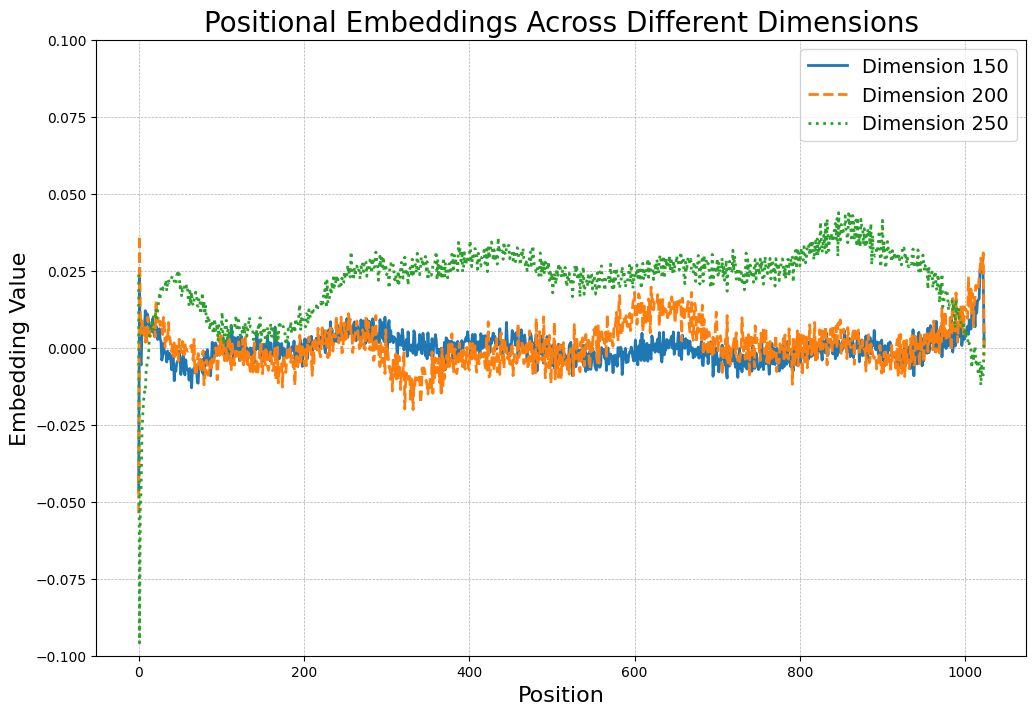

In [24]:
positional_embeddings = sd_hf["transformer.wpe.weight"]
plt.figure(figsize=(12, 8))
plt.plot(positional_embeddings[:, 150], label="Dimension 150", linewidth=2)
plt.plot(
    positional_embeddings[:, 200], label="Dimension 200", linewidth=2, linestyle="--"
)
plt.plot(
    positional_embeddings[:, 250], label="Dimension 250", linewidth=2, linestyle=":"
)

plt.title("Positional Embeddings Across Different Dimensions", fontsize=20)
plt.xlabel("Position", fontsize=16)
plt.ylabel("Embedding Value", fontsize=16)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=14)
plt.ylim([-0.1, 0.1])

# Show the plot
plt.show()

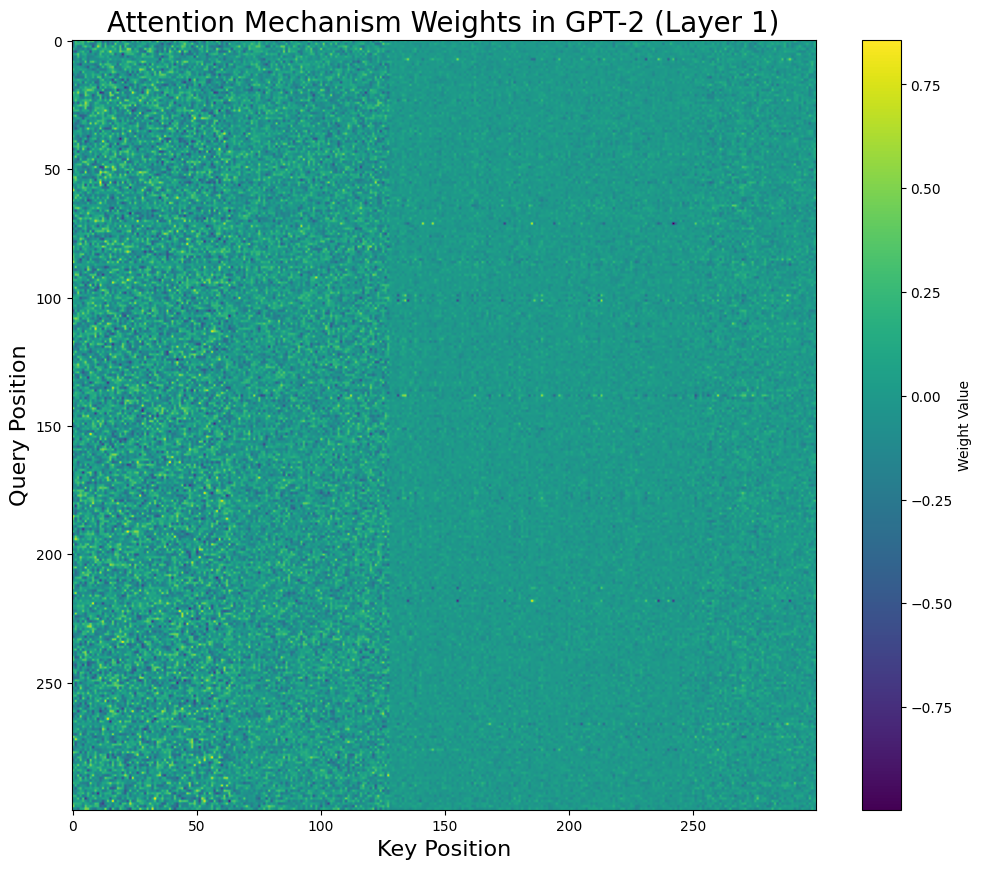

In [30]:
attention_weights = sd_hf["transformer.h.1.attn.c_attn.weight"][:300, :300]

plt.figure(figsize=(12, 10))
plt.imshow(attention_weights, cmap="viridis", aspect="auto")
plt.colorbar(label="Weight Value")
plt.title("Attention Mechanism Weights in GPT-2 (Layer 1)", fontsize=20)
plt.xlabel("Key Position", fontsize=16)
plt.ylabel("Query Position", fontsize=16)
plt.grid(False)
plt.show()

In [34]:
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model="gpt2")
set_seed(42)
generator("Hello, I'am a language model,", max_length=30, num_return_sequences=5)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'am a language model, I'm writing a new language for you. But first, I'd like to tell you about the language"},
 {'generated_text': "Hello, I'am a language model, and I'd like to join you.\n\nWelcome back,\n\nYasuhan! Well"},
 {'generated_text': "Hello, I'am a language model, but I don't get what goes on here anymore...I just don't get what makes you feel real"},
 {'generated_text': "Hello, I'am a language model, a culture model... It's not me, it's me!\n\nI'am a civilization model"},
 {'generated_text': "Hello, I'am a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties"}]